In [1]:
from transformers import GPT2LMHeadModel



/Users/lazarzivanovic/Desktop/gpt2/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = GPT2LMHeadModel.from_pretrained("gpt2")

state_dict = model.state_dict()

state_dict() is crucial method because it returns a map of layers and learnable parameters associated with them. Saving and Loading Models via state_dict is highly recommended/ torch.save(model.state_dict(), PATH) will save just the learned parameters, making the saved fil smaller and more flexible. In order to load out model, we first need to instantiate model class and then load the state_dcit into it using model.load_state_dict(torch.load(PATH))

model.state_dict() returns a reference to the state, not a deep copy. If we intend to keep a snapshot of the state_dict (e.g. for saving the best model), we should use deepcopy(model.state_dict()) or save it immediately to disk to avoid uninteded modifications during further training.

model.state_dict().keys() is very useful to inspec names of your model's parameters

When using state_dict() to resume the training we need to save not only model's state_dict() but also the optimizer's state_dict() because the optimizer also maintains the internal states that are crucial for continuing the training process

In [6]:
state_dict.keys()

odict_keys(['transformer.wte.weight', 'transformer.wpe.weight', 'transformer.h.0.ln_1.weight', 'transformer.h.0.ln_1.bias', 'transformer.h.0.attn.c_attn.weight', 'transformer.h.0.attn.c_attn.bias', 'transformer.h.0.attn.c_proj.weight', 'transformer.h.0.attn.c_proj.bias', 'transformer.h.0.ln_2.weight', 'transformer.h.0.ln_2.bias', 'transformer.h.0.mlp.c_fc.weight', 'transformer.h.0.mlp.c_fc.bias', 'transformer.h.0.mlp.c_proj.weight', 'transformer.h.0.mlp.c_proj.bias', 'transformer.h.1.ln_1.weight', 'transformer.h.1.ln_1.bias', 'transformer.h.1.attn.c_attn.weight', 'transformer.h.1.attn.c_attn.bias', 'transformer.h.1.attn.c_proj.weight', 'transformer.h.1.attn.c_proj.bias', 'transformer.h.1.ln_2.weight', 'transformer.h.1.ln_2.bias', 'transformer.h.1.mlp.c_fc.weight', 'transformer.h.1.mlp.c_fc.bias', 'transformer.h.1.mlp.c_proj.weight', 'transformer.h.1.mlp.c_proj.bias', 'transformer.h.2.ln_1.weight', 'transformer.h.2.ln_1.bias', 'transformer.h.2.attn.c_attn.weight', 'transformer.h.2.attn.

In [3]:
print(state_dict)

OrderedDict({'transformer.wte.weight': tensor([[-0.1101, -0.0393,  0.0331,  ..., -0.1364,  0.0151,  0.0453],
        [ 0.0403, -0.0486,  0.0462,  ...,  0.0861,  0.0025,  0.0432],
        [-0.1275,  0.0479,  0.1841,  ...,  0.0899, -0.1297, -0.0879],
        ...,
        [-0.0445, -0.0548,  0.0123,  ...,  0.1044,  0.0978, -0.0695],
        [ 0.1860,  0.0167,  0.0461,  ..., -0.0963,  0.0785, -0.0225],
        [ 0.0514, -0.0277,  0.0499,  ...,  0.0070,  0.1552,  0.1207]]), 'transformer.wpe.weight': tensor([[-1.8821e-02, -1.9742e-01,  4.0267e-03,  ..., -4.3044e-02,
          2.8267e-02,  5.4490e-02],
        [ 2.3959e-02, -5.3792e-02, -9.4879e-02,  ...,  3.4170e-02,
          1.0172e-02, -1.5573e-04],
        [ 4.2161e-03, -8.4764e-02,  5.4515e-02,  ...,  1.9745e-02,
          1.9325e-02, -2.1424e-02],
        ...,
        [-1.7987e-03,  1.6052e-03, -5.5103e-02,  ...,  1.3617e-02,
         -7.1805e-03,  3.7552e-03],
        [ 3.2105e-03,  1.5501e-03, -4.8944e-02,  ...,  2.0725e-02,
        

In [5]:
for key, value in state_dict.items():
    print(key, value.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [13]:
# Embedding table - Holds learned embbedings of each token
state_dict["transformer.wte.weight"]

tensor([[-0.1101, -0.0393,  0.0331,  ..., -0.1364,  0.0151,  0.0453],
        [ 0.0403, -0.0486,  0.0462,  ...,  0.0861,  0.0025,  0.0432],
        [-0.1275,  0.0479,  0.1841,  ...,  0.0899, -0.1297, -0.0879],
        ...,
        [-0.0445, -0.0548,  0.0123,  ...,  0.1044,  0.0978, -0.0695],
        [ 0.1860,  0.0167,  0.0461,  ..., -0.0963,  0.0785, -0.0225],
        [ 0.0514, -0.0277,  0.0499,  ...,  0.0070,  0.1552,  0.1207]])

In [14]:
vocab_size = state_dict['transformer.wte.weight'].shape[0]
token_embbeding_dim = state_dict['transformer.wte.weight'].shape[1]

print(f"Vocab size: {vocab_size}\nToken Embedding Dim: {token_embbeding_dim}")

Vocab size: 50257
Token Embedding Dim: 768


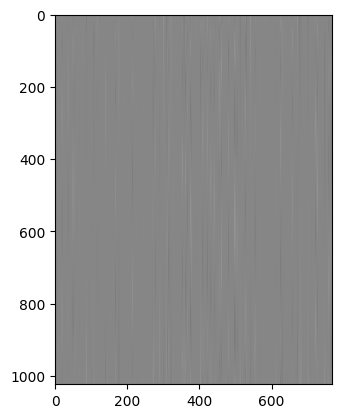

In [ ]:
# Word Position Embeddings
# Because Attention Mechanism by itself does not understand positions (order of the words in a sequence)
#  - it is permutation invariant - we need to inject positional information
# To achive this model learn a set of positional embedding vectors
# Positional embeddings than get added to token embeddings so the dimensions of embedding vector and positional
# vector must match (768)
# Model must learn positinal embedding for every possible position in context window - 1024 positions for gpt2


import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(state_dict["transformer.wpe.weight"], cmap="grey")

# Each row on the image represents positional embedding 1 to 1024 positions - 1024 is max sequence length
# Depending on the position of a token in an input sequence we will add the corresponding positional embedding  

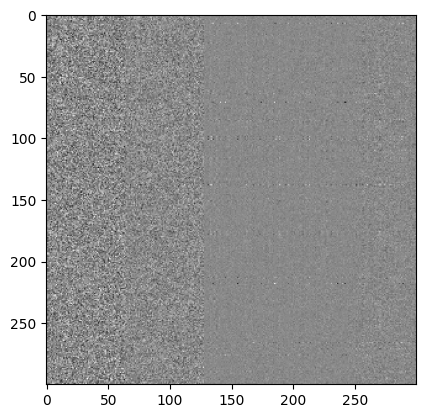

In [19]:
# Weight visualization
plt.imshow(state_dict['transformer.h.1.attn.c_attn.weight'][:300,:300], cmap='grey')

In [ ]:
import torch

if torch.backends.mps.is_available():
    device = "mps" # Metal Performance Shaders
    print("Using Apple Silicon MPS for inference")

Using Apple Silicon MPS for inference


In [26]:
from transformers import pipeline, set_seed

generator = pipeline('text-generation', model='gpt2', device=device)
set_seed(42)

generator("Hello, I am a language model, ", max_length=30, num_return_sequences=5)

Device set to use mps
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "Hello, I am a language model, \xa0I am a model of the world, \xa0I am a model of the past.\nWith that, let's talk about the concepts we're going to use here. The basics are that we are a language, and we are a model of the world. In other words, we're a model of the past and the future. We're a model of the future as long as we aren't creating a new model of the past.\nWe're a model of the future as long as we aren't creating a new model of the past.\nIn this article, we will discuss the concepts we'll use to create our models. In this article, we will use the basic concepts we have used in our models. In this article, we will be using the models.\nWe'll walk through the concepts we should use when creating a new language model.\nThe basics of a model\nThe concept of a model is a function that takes an object and returns a new string, which we'll use for our models.\nOur model is a model of the past, a view of the world.\nWe are a model of the future. We are a view

In [52]:
x = torch.Tensor(1, 2, 6)

In [53]:
x

tensor([[[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]]])

In [63]:
W = torch.Tensor(6, 18)

In [64]:
qkv = x @ W

In [65]:
qkv

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

In [66]:
q, k, v = qkv.split(6, dim=2)

In [67]:
q

tensor([[[0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0.]]])

In [68]:
q.view(1, 2, 3, 2)

tensor([[[[0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.]]]])

In [69]:
torch.tril(torch.ones(5, 5))

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [71]:
att = torch.ones(2, 2, 5, 5)

In [72]:
att

tensor([[[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]],


        [[[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]],

         [[1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.],
          [1., 1., 1., 1., 1.]]]])

In [74]:
att.masked_fill(torch.tril(torch.ones(5, 5)) == 0, float('-inf'))

tensor([[[[1., -inf, -inf, -inf, -inf],
          [1., 1., -inf, -inf, -inf],
          [1., 1., 1., -inf, -inf],
          [1., 1., 1., 1., -inf],
          [1., 1., 1., 1., 1.]],

         [[1., -inf, -inf, -inf, -inf],
          [1., 1., -inf, -inf, -inf],
          [1., 1., 1., -inf, -inf],
          [1., 1., 1., 1., -inf],
          [1., 1., 1., 1., 1.]]],


        [[[1., -inf, -inf, -inf, -inf],
          [1., 1., -inf, -inf, -inf],
          [1., 1., 1., -inf, -inf],
          [1., 1., 1., 1., -inf],
          [1., 1., 1., 1., 1.]],

         [[1., -inf, -inf, -inf, -inf],
          [1., 1., -inf, -inf, -inf],
          [1., 1., 1., -inf, -inf],
          [1., 1., 1., 1., -inf],
          [1., 1., 1., 1., 1.]]]])

In [80]:
torch.Tensor(2,2,2).contiguous()

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])

In [81]:
import torch
from torch.nn import functional as F

model = GPT2LMHeadModel.from_pretrained("gpt2") # 124M
model.eval()
model.to('mps')
torch.manual_seed(42)
torch.mps.manual_seed(42)
tokens = [15496, 11, 314, 1101, 257, 3303, 2746, 11] # "Hello, I'm a language model,"
tokens = torch.tensor(tokens, dtype=torch.long) # (8,)
tokens = tokens.unsqueeze(0).repeat(5, 1) # (5, 8)
x = tokens.to('mps')

# generate!
while x.size(1) < 30: # max_length=30
    # forward the model to get the logits
    with torch.no_grad():
        logits = model(x)[0] # (B, T, vocab_size)
        # take the logits at the last position
        logits = logits[:, -1, :] # (B, vocab_size)
        # get the probabilities
        probs = F.softmax(logits, dim=-1)
        # do top-k sampling of 50 (huggingface pipeline default)
        # topk_probs here becomes (5, 50), topk_indices is (5, 50)
        topk_probs, topk_indices = torch.topk(probs, 50, dim=-1)
        # select a token from the top-k probabilities
        # note: multinomial does not demand the input to sum to 1
        ix = torch.multinomial(topk_probs, 1) # (B, 1)
        # gather the corresponding indices
        xcol = torch.gather(topk_indices, -1, ix) # (B, 1)
        # append to the sequence
        x = torch.cat((x, xcol), dim=1)

# print the generated text
import tiktoken
enc = tiktoken.get_encoding('gpt2')
for i in range(5):
    tokens = x[i, :30].tolist()
    decoded = enc.decode(tokens)
    print(">", decoded)

> Hello, I'm a language model, which means I'm familiar with it, but I'm not fluent in that. Well, with that said,
> Hello, I'm a language model, and the syntax, to make use of it, is pretty good. So why do you have that and not
> Hello, I'm a language model, I'm doing this work in Python, and then I'm writing code for Haskell.

So we can
> Hello, I'm a language model, and you're making assumptions about my use of them. I'm not a natural language learner. I'm
> Hello, I'm a language model, well, I'm from Java and have to write a programming language for it. I have my own vocabulary because


In [78]:
torch.arange(0,5)

tensor([0, 1, 2, 3, 4])

In [101]:
linear = torch.nn.Linear(in_features=3, out_features=5, bias=False)

# This should give us weight matrix of the following dimension (5, 3)
linear.weight.size()

torch.Size([5, 3])

In [98]:
# 2 example each example has 3 features
examples = torch.ones(2, 3, dtype=torch.float)

In [ ]:
# This is not compatible since we are trying to multiply (2, 3) tensor with (5, 3)
# examples @ linear.weight

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x3 and 5x3)

In [102]:
# This will work because in a forward function of a nn.Linear nn.functinal.Linear() gets called which does x*W^T + bias
examples = linear(examples)

In [103]:
examples

tensor([[ 0.2415,  0.5968,  0.7298, -1.1465,  0.1972],
        [ 0.2415,  0.5968,  0.7298, -1.1465,  0.1972]], grad_fn=<MmBackward0>)

In [105]:
# We can veify that

examples = torch.ones(2, 3, dtype=torch.float)

torch.nn.functional.linear(examples, linear.weight)

tensor([[ 0.2415,  0.5968,  0.7298, -1.1465,  0.1972],
        [ 0.2415,  0.5968,  0.7298, -1.1465,  0.1972]], grad_fn=<MmBackward0>)

In [106]:
examples @ linear.weight.T

tensor([[ 0.2415,  0.5968,  0.7298, -1.1465,  0.1972],
        [ 0.2415,  0.5968,  0.7298, -1.1465,  0.1972]], grad_fn=<MmBackward0>)

In [ ]:
# This create a simple look up table and is used for storing word embeddings

embd = torch.nn.Embedding(num_embeddings=5, embedding_dim=3)

In [111]:
embd.weight.size()

torch.Size([5, 3])

In [125]:
embd.weight

Parameter containing:
tensor([[-1.2754, -1.9245,  0.4336],
        [ 0.6641, -0.4337, -0.4201],
        [-0.9500, -1.0014, -0.7719],
        [ 1.3434,  0.9560, -1.0110],
        [-0.3568,  0.7147, -0.2398]], requires_grad=True)

In [126]:
idx = torch.randint(1, 5, (2, 3))

In [127]:
idx

tensor([[2, 2, 4],
        [2, 3, 4]])

In [129]:
# Now for each value in idx we will pluck out the row with that corresponds to value of idx from embd table
embd(idx)

tensor([[[-0.9500, -1.0014, -0.7719],
         [-0.9500, -1.0014, -0.7719],
         [-0.3568,  0.7147, -0.2398]],

        [[-0.9500, -1.0014, -0.7719],
         [ 1.3434,  0.9560, -1.0110],
         [-0.3568,  0.7147, -0.2398]]], grad_fn=<EmbeddingBackward0>)